<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_8_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -q dog_breed_image_dataset.zip

# Step 3: Load images properly

In [2]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

image_size = 64

breeds = sorted(os.listdir('dataset'))
num_classes = len(breeds)
print(f"Number of breeds: {num_classes}")

images = []
labels = []

for label_id, breed in enumerate(breeds):
    breed_folder = os.path.join('dataset', breed)
    for image_name in os.listdir(breed_folder):
        image_path = os.path.join(breed_folder, image_name)
        try:
          img = Image.open(image_path).convert('RGB')
          img = img.resize((image_size, image_size))
          images.append(np.array(img))
          labels.append(label_id)
        except:
          pass

x = np.array(images) / 255.0
y = to_categorical(np.array(labels), num_classes)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"X_train: {x_train.shape}, X_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Number of breeds: 10
X_train: (676, 64, 64, 3), X_test: (291, 64, 64, 3)
y_train: (676, 10), y_test: (291, 10)


# Step 4: Build MLP

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

mlp_model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    12,583,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,274,250 (50.64 MB)

 Trainable params: 13,274,250 (50.64 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Adam Optimizer + parameters

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history = mlp_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=30
)

# calculating f1 for each epoch

precision = history.history['precision']
recall = history.history['recall']

f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

for epoch, score in enumerate(f1, 1):
    print(f"Epoch {epoch} has -> F1 = {score:.4f}")

val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]

print("Final Training F1:", f1[-1])
print("Final Validation F1:", val_f1[-1])

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.0820 - loss: 5.6101 - precision: 0.0728 - recall: 0.0374 - val_accuracy: 0.0859 - val_loss: 3.1976 - val_precision: 0.1103 - val_recall: 0.0515
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1145 - loss: 2.8227 - precision: 0.0962 - recall: 0.0182 - val_accuracy: 0.1581 - val_loss: 2.4299 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2310 - loss: 2.3516 - precision: 0.4890 - recall: 0.0250 - val_accuracy: 0.2371 - val_loss: 2.1005 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2197 - loss: 2.1757 - precision: 0.3857 - recall: 0.0067 - val_accuracy: 0.2852 - val_loss: 1.9367 - val_precision: 1.0000 - val_recall: 0.0172
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3155 - loss: 1.9119 - precision: 0.8962 - recall: 0.0274 - val_accuracy: 0.3127 - val_

# Step 6: MLP Results Visualization

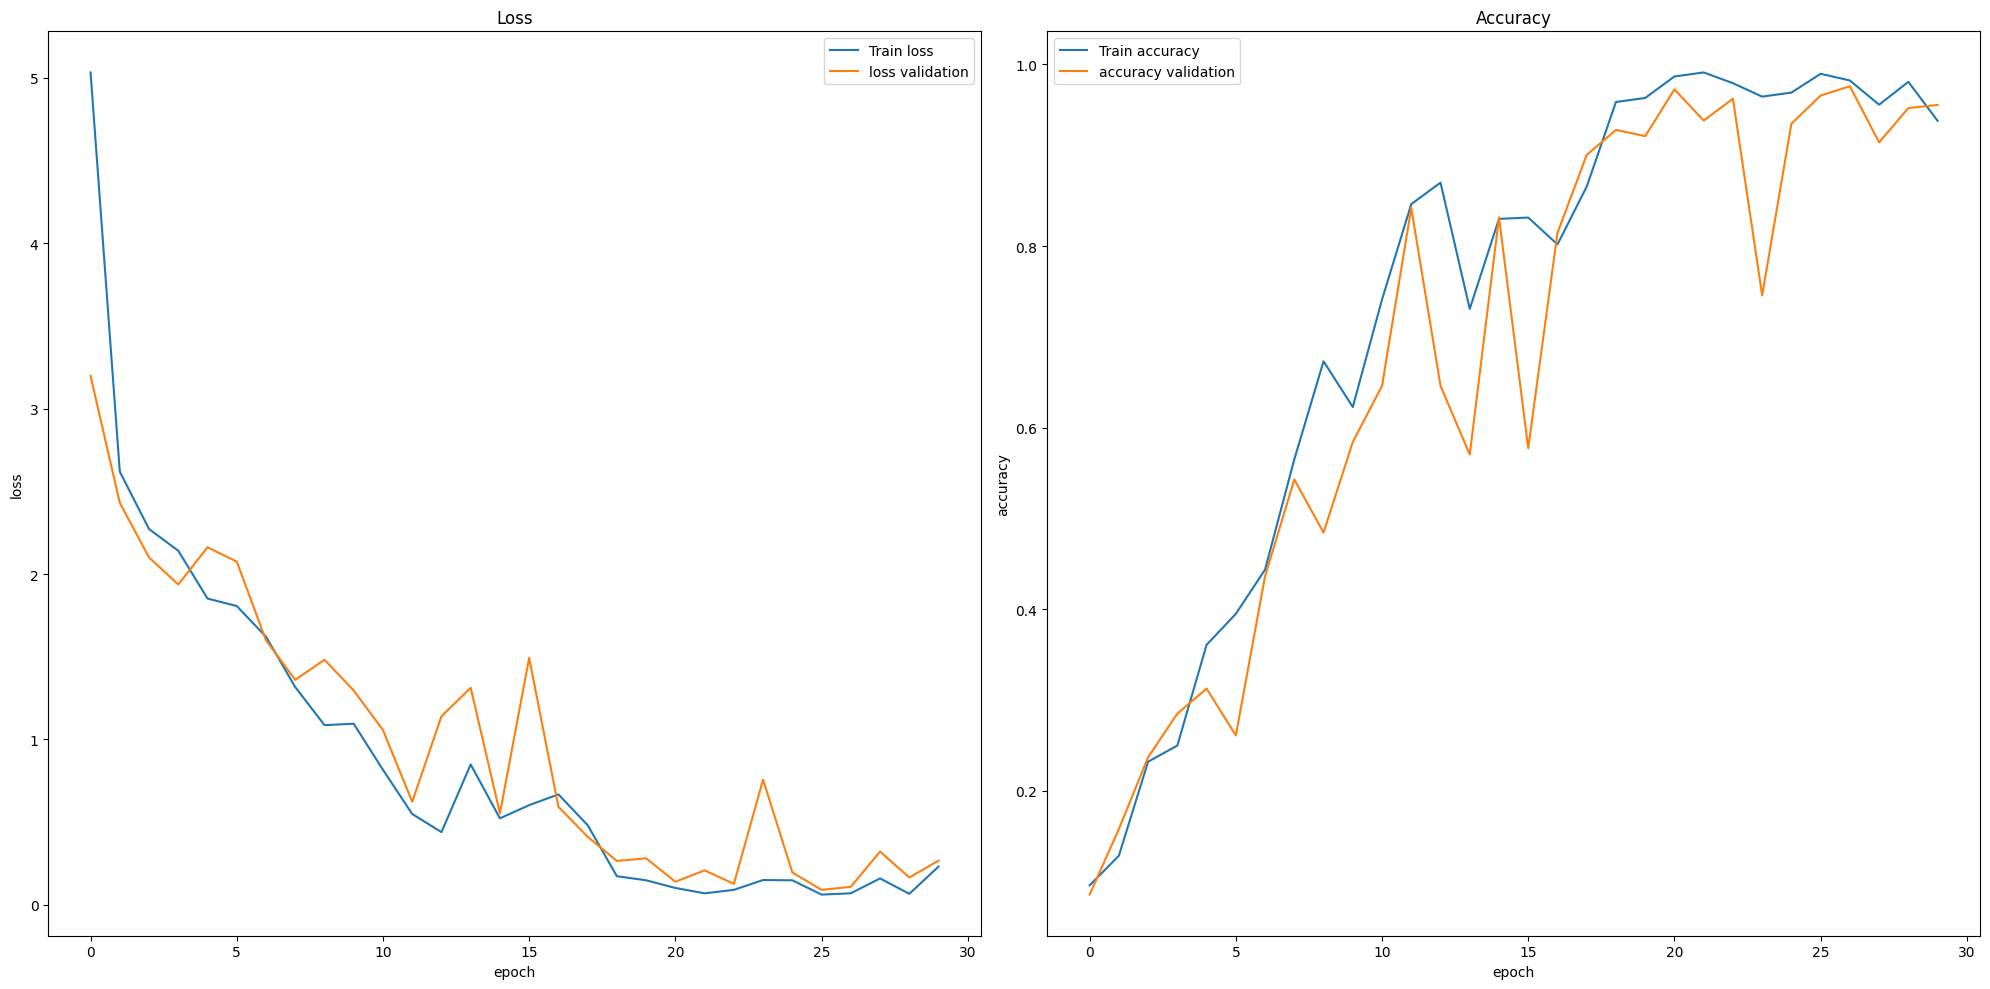

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# loss decreament over epochs
axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='loss validation')
axes[0].set_title('Loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].legend()

# accuracy increament over epochs
axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='accuracy validation')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

# Step 7a: Build + Compile + Metrics on CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,722 (4.87 MB)

 Trainable params: 1,275,722 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

cnn_history = cnn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=30
)

# calculating f1 for each epoch

precision = cnn_history.history['precision']
recall = cnn_history.history['recall']

f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

for epoch, score in enumerate(f1, 1):
    print(f"Epoch {epoch} has -> F1 = {score:.4f}")

val_precision = cnn_history.history['val_precision']
val_recall = cnn_history.history['val_recall']

val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]

print("Final Training F1:", f1[-1])
print("Final Validation F1:", val_f1[-1])

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.9559 - loss: 0.1499 - precision: 0.9594 - recall: 0.9510 - val_accuracy: 0.9725 - val_loss: 0.0848 - val_precision: 0.9826 - val_recall: 0.9725
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9929 - loss: 0.0341 - precision: 0.9980 - recall: 0.9899 - val_accuracy: 0.9966 - val_loss: 0.0434 - val_precision: 0.9965 - val_recall: 0.9897
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0045 - precision: 1.0000 - recall: 0.9974 - val_accuracy: 0.9966 - val_loss: 0.0328 - val_precision: 0.9966 - val_recall: 0.9966
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 9.7326e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9966 - val_loss: 0.0373 - val_precision: 0.9966 - val_recall: 0.9966
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 4.2092e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9966 - val_loss

# Step 7b: CNN Results Visualization

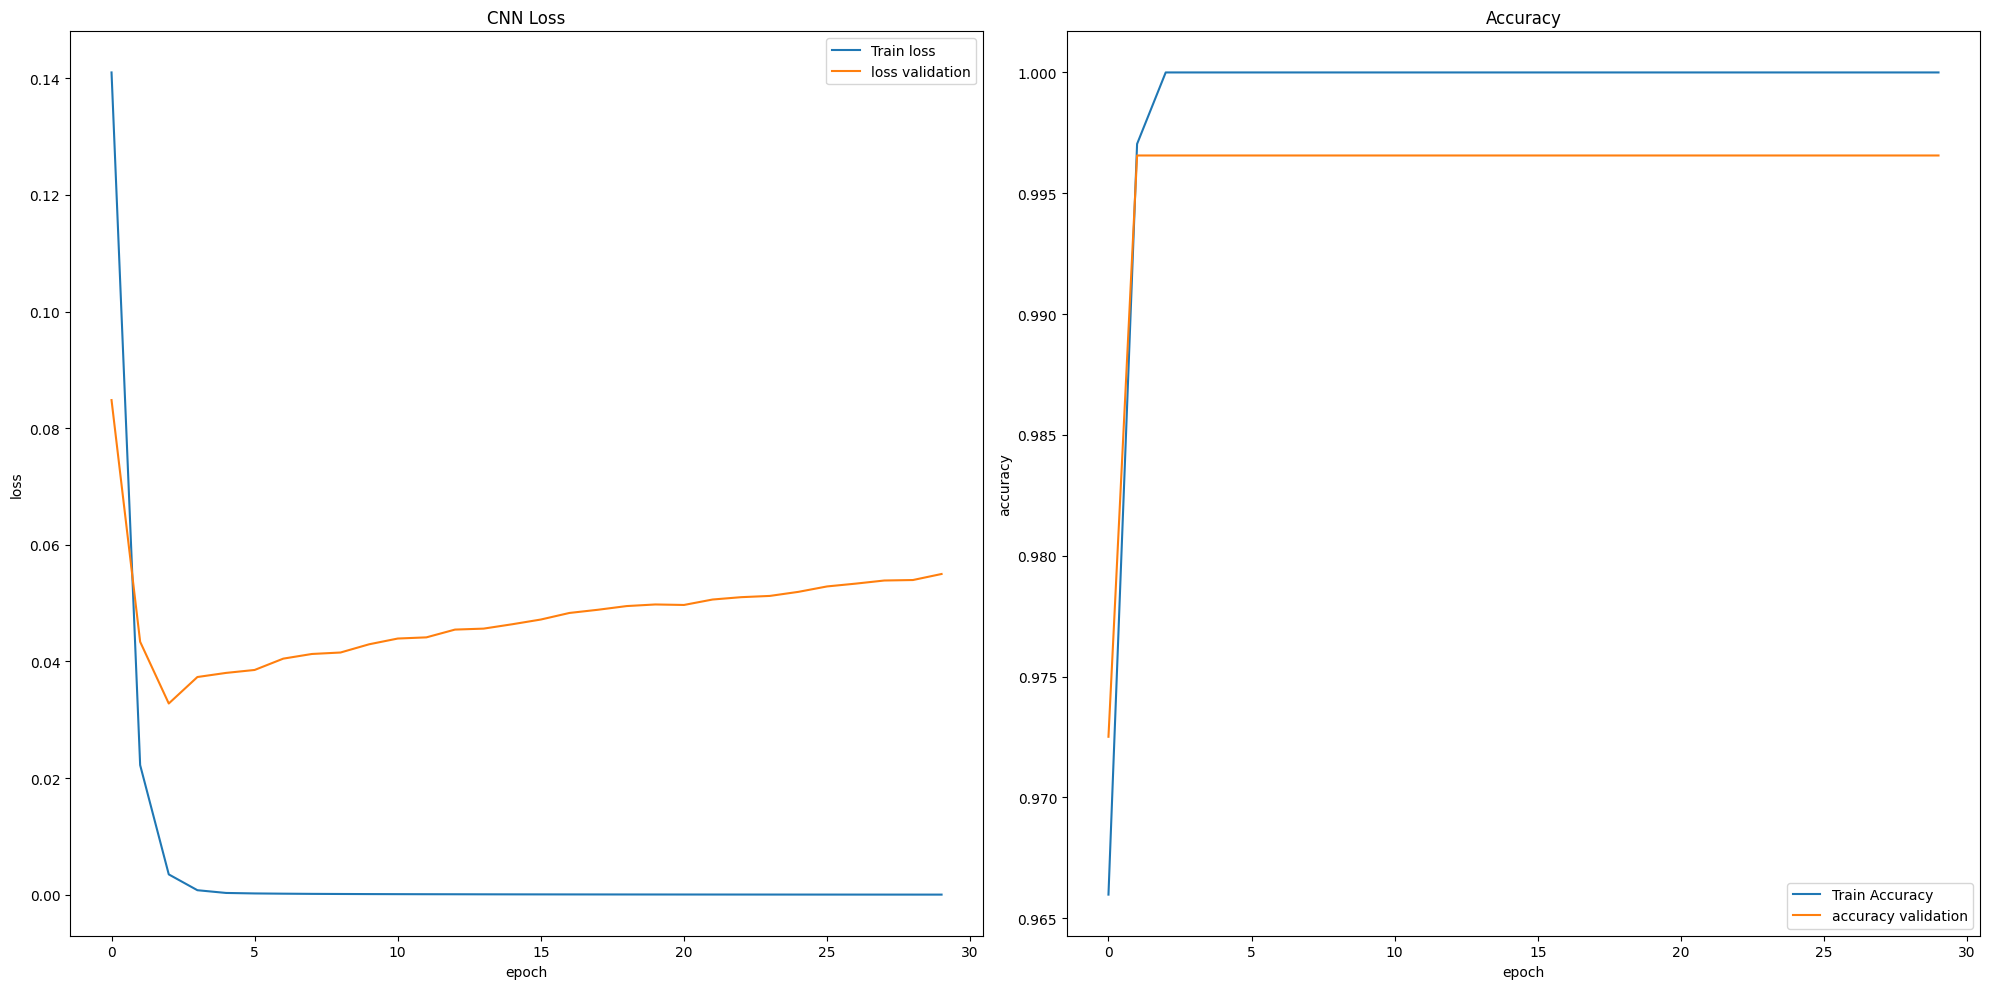

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# loss decreament over epochs
axes[0].plot(cnn_history.history['loss'], label='Train loss')
axes[0].plot(cnn_history.history['val_loss'], label='loss validation')
axes[0].set_title('CNN Loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].legend()

# accuracy increament over epochs
axes[1].plot(cnn_history.history['accuracy'], label='Train Accuracy')
axes[1].plot(cnn_history.history['val_accuracy'], label='accuracy validation')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()